In [2]:
import tifffile as tf 
import zarr 
import palom
# import pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay
import pickle
import os
import time
# import torch
# import torch.nn as nn
from tqdm.auto import tqdm
import numpy as np
import tifffile as tf
import zarr
import dask.array as da
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import cellcutter
import cellcutter.cli
from numcodecs import Blosc
# import logging
# logger = logging.getLogger()
# logger.setLevel(logging.DEBUG)
# logging.debug("test")

TypeError: Invalid shape (3, 2045, 2406) for image data

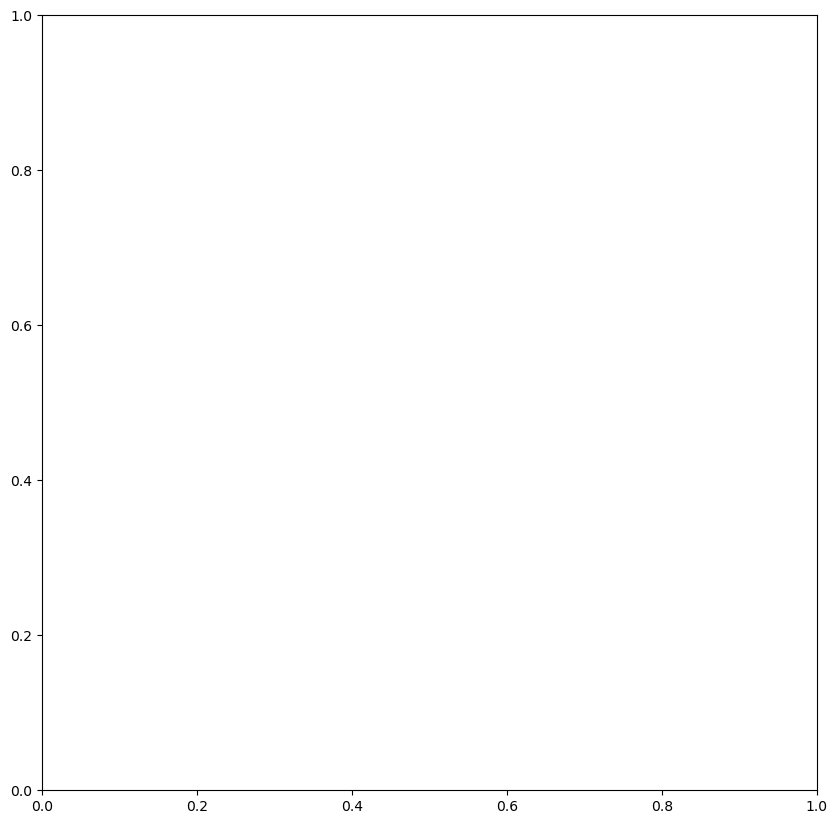

In [48]:
CSV_PATH = '/Users/swarchol/Downloads/seal/objects.csv'

df = pd.read_csv(CSV_PATH)
features = df
# load numpy arrays and stack them
image_channels = np.stack([np.load(f'/Users/swarchol/Downloads/seal/filter-{feature}.npy') for feature in ['u', 'g', 'r', 'i', 'z']])
fig, axs = plt.subplots(1, 1, figsize=(10, 20))
# visualize first 3 channels as rgb
# first_3_channels = image_channels[0:3, :, :]
# flip so channels are last
first_3_channels = np.transpose(first_3_channels, (1, 2, 0))
axs.imshow(first_3_channels, vmin=0, vmax=1)

# sdss_df = pd.read_csv('/Users/swarchol/sdss_results.csv')

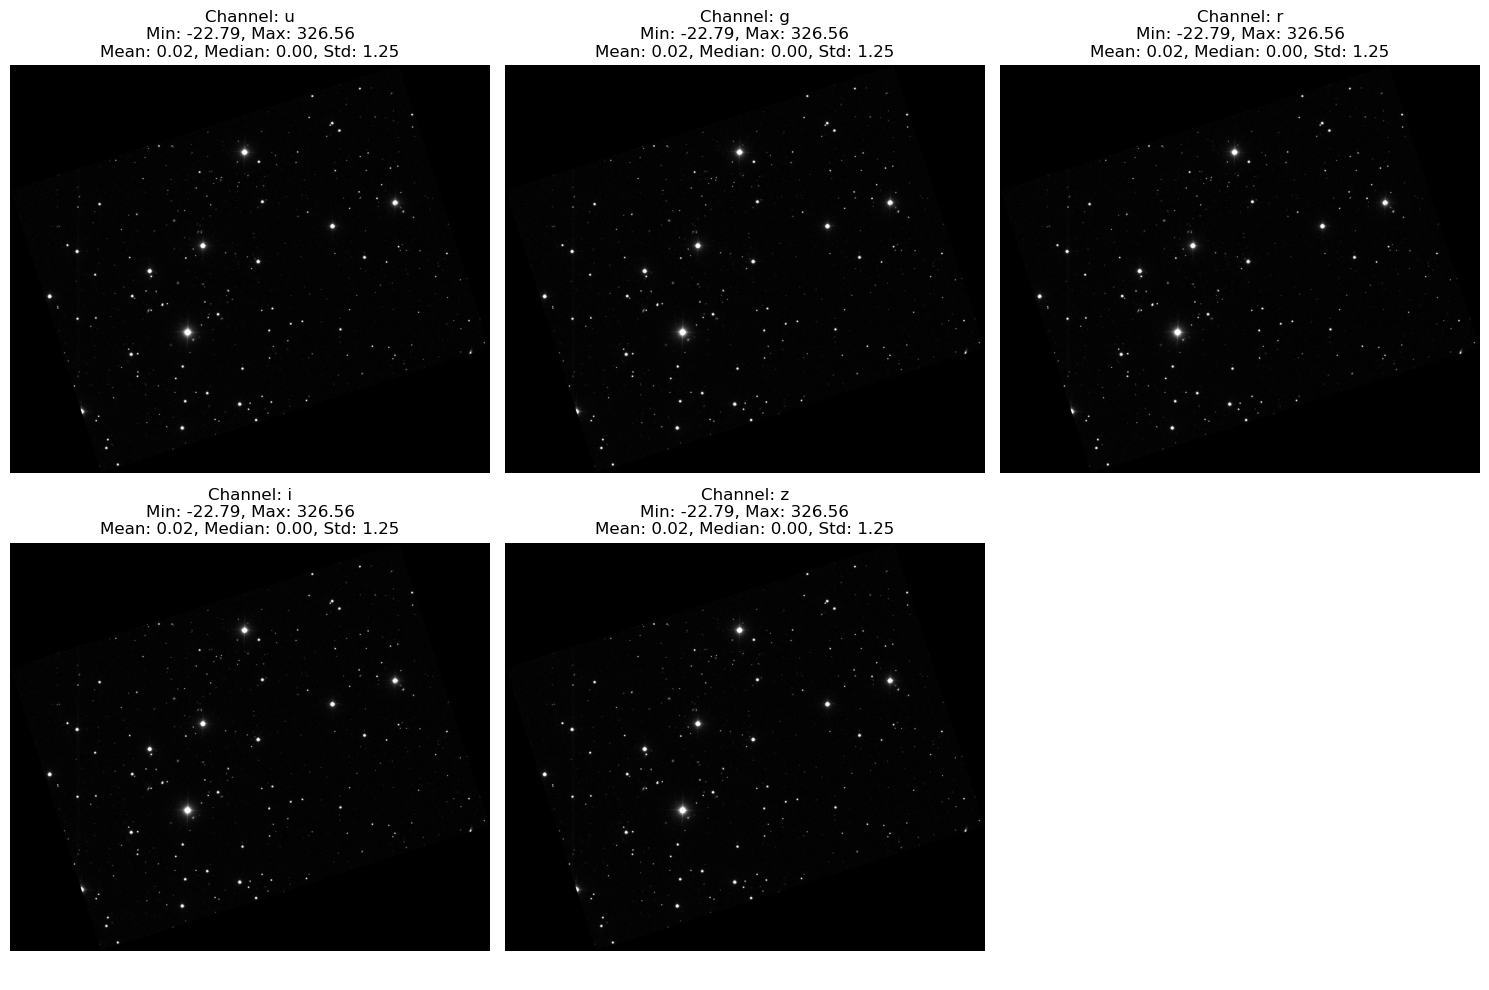

In [49]:
# plot each of the image channels as a subplot in a grid layout
channel_names = ['u', 'g', 'r', 'i', 'z']
n_channels = len(channel_names)
n_rows = 2  # You can adjust these numbers to change the grid layout
n_cols = 3  # This gives us a 2x3 grid with one empty spot
fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axs = axs.flatten()  # Flatten the 2D array of axes to make indexing easier

for i, (channel, name) in enumerate(zip(image_channels, channel_names)):
    min_val = channel.min()
    max_val = channel.max()
    mean_val = channel.mean()
    median_val = np.median(channel)
    std_val = channel.std()
    
    axs[i].imshow(channel, cmap='gray',vmin=0,vmax=1)
    axs[i].set_title(f"Channel: {name}\nMin: {min_val:.2f}, Max: {max_val:.2f}\nMean: {mean_val:.2f}, Median: {median_val:.2f}, Std: {std_val:.2f}")
    axs[i].axis('off')

# Turn off any empty subplots
for i in range(n_channels, len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [57]:
test1 = np.load('/Users/swarchol/Downloads/seal/filter-u.npy')
test2 = np.load('/Users/swarchol/Downloads/seal/filter-g.npy')

In [58]:
np.array_equal(test1, test2)

True